In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Hp\AppData\Local\Temp\ipykernel_33972\1032708377.py:3: SyntaxWarning: invalid escape sequence '\D'
  prices_df = pd.read_csv("D:\Documents\GitHub\Sports Website\AlgoTradingBacktester\data\drowzee_prices.csv")
C:\Users\Hp\AppData\Local\Temp\ipykernel_33972\1032708377.py:4: SyntaxWarning: invalid escape sequence '\D'
  trades_df = pd.read_csv("D:\Documents\GitHub\Sports Website\AlgoTradingBacktester\data\drowzee_trades.csv")


=== DROWZEE MARKET ANALYSIS ===
Price Range: 2024 - 2044
Average Mid Price: 2034.55
Average Spread: 2.73
Price Volatility (std): 2.42

Trade Analysis:
Total Trades: 2876
Average Trade Size: 2.88
Trade Price Range: 2025 - 2043

Mean Reversion Signals:
Times above upper band: 368
Times below lower band: 330


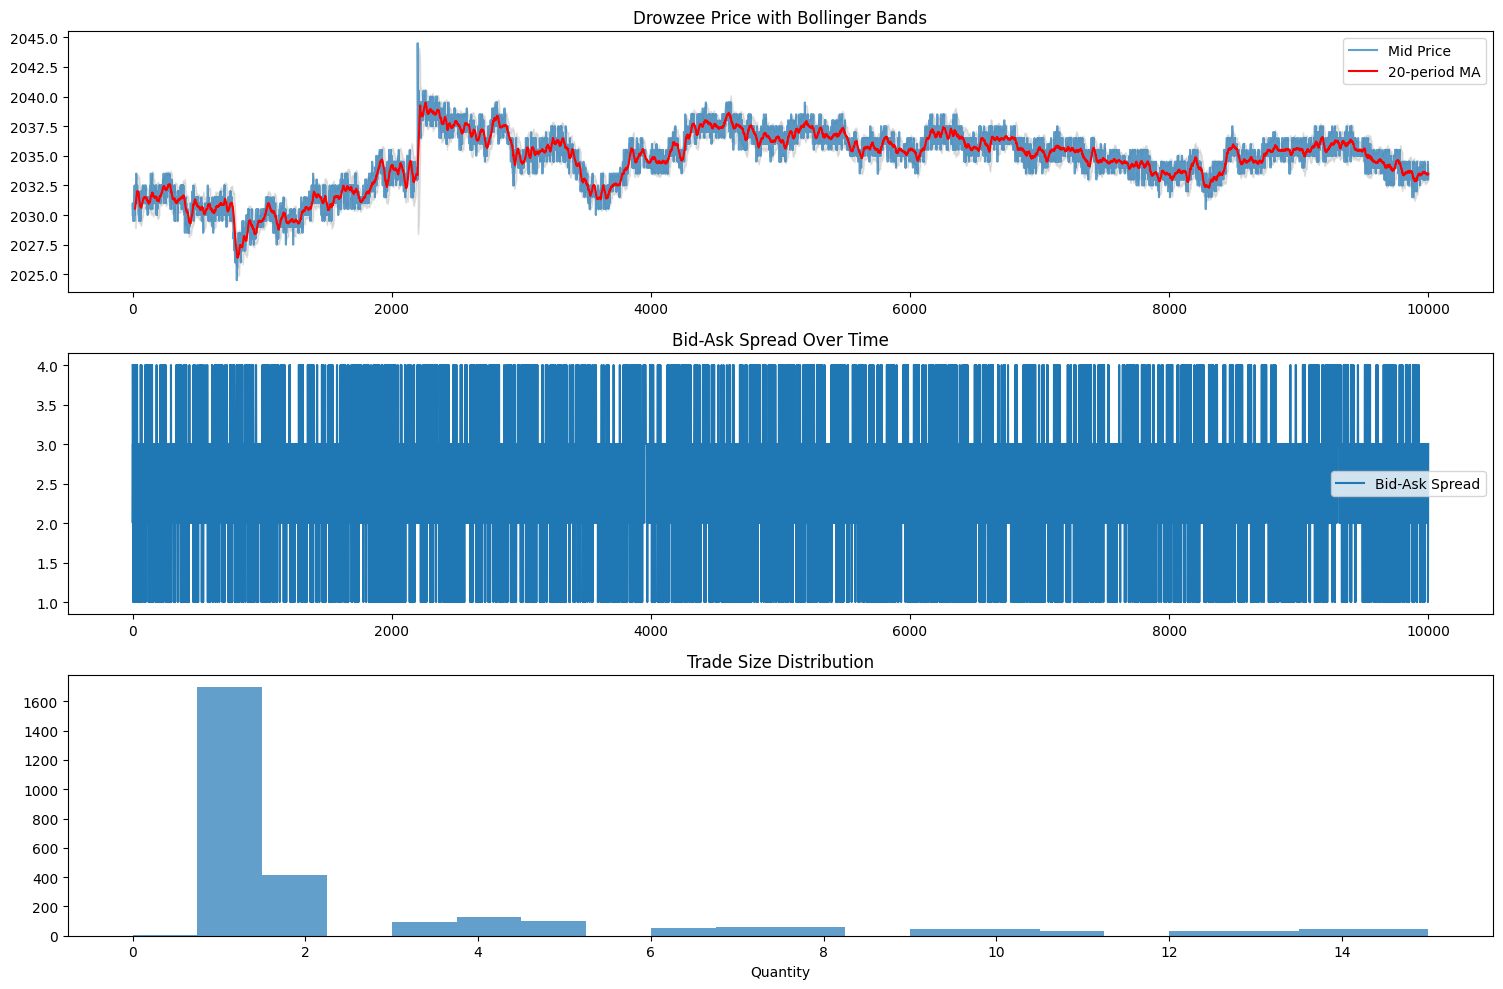

(      timestamp  bid_price_1  bid_volume_1  bid_price_2  bid_volume_2  \
 0             0         2028            30          NaN           NaN   
 1             1         2030             4       2028.0          31.0   
 2             2         2029             1       2028.0          21.0   
 3             3         2029            25          NaN           NaN   
 4             4         2029             2       2028.0          23.0   
 ...         ...          ...           ...          ...           ...   
 9995       9995         2032            28          NaN           NaN   
 9996       9996         2032            36          NaN           NaN   
 9997       9997         2034             1       2032.0          26.0   
 9998       9998         2032            27          NaN           NaN   
 9999       9999         2032            23          NaN           NaN   
 
       bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  ask_price_2  \
 0             NaN           NaN  

In [2]:
def analyze_drowzee_data():
    # Load the data
    prices_df = pd.read_csv("D:\Documents\GitHub\Sports Website\AlgoTradingBacktester\data\drowzee_prices.csv")
    trades_df = pd.read_csv("D:\Documents\GitHub\Sports Website\AlgoTradingBacktester\data\drowzee_trades.csv")
    
    # Calculate mid prices
    prices_df['mid_price'] = (prices_df['bid_price_1'] + prices_df['ask_price_1']) / 2
    prices_df['spread'] = prices_df['ask_price_1'] - prices_df['bid_price_1']
    
    # Basic statistics
    print("=== DROWZEE MARKET ANALYSIS ===")
    print(f"Price Range: {prices_df['mid_price'].min():.0f} - {prices_df['mid_price'].max():.0f}")
    print(f"Average Mid Price: {prices_df['mid_price'].mean():.2f}")
    print(f"Average Spread: {prices_df['spread'].mean():.2f}")
    print(f"Price Volatility (std): {prices_df['mid_price'].std():.2f}")
    
    # Trade analysis
    print(f"\nTrade Analysis:")
    print(f"Total Trades: {len(trades_df)}")
    print(f"Average Trade Size: {trades_df['quantity'].mean():.2f}")
    print(f"Trade Price Range: {trades_df['price'].min()} - {trades_df['price'].max()}")
    
    # Mean reversion indicators
    rolling_mean = prices_df['mid_price'].rolling(window=20).mean()
    rolling_std = prices_df['mid_price'].rolling(window=20).std()
    
    # Count reversions (price moves > 2 std then reverts)
    upper_band = rolling_mean + 2 * rolling_std
    lower_band = rolling_mean - 2 * rolling_std
    
    above_upper = prices_df['mid_price'] > upper_band
    below_lower = prices_df['mid_price'] < lower_band
    
    print(f"\nMean Reversion Signals:")
    print(f"Times above upper band: {above_upper.sum()}")
    print(f"Times below lower band: {below_lower.sum()}")
    
    # Plot analysis
    plt.figure(figsize=(15, 10))
    
    plt.subplot(3, 1, 1)
    plt.plot(prices_df['timestamp'], prices_df['mid_price'], label='Mid Price', alpha=0.7)
    plt.plot(prices_df['timestamp'], rolling_mean, label='20-period MA', color='red')
    plt.fill_between(prices_df['timestamp'], upper_band, lower_band, alpha=0.2, color='gray')
    plt.title('Drowzee Price with Bollinger Bands')
    plt.legend()
    
    plt.subplot(3, 1, 2)
    plt.plot(prices_df['timestamp'], prices_df['spread'], label='Bid-Ask Spread')
    plt.title('Bid-Ask Spread Over Time')
    plt.legend()
    
    plt.subplot(3, 1, 3)
    plt.hist(trades_df['quantity'], bins=20, alpha=0.7)
    plt.title('Trade Size Distribution')
    plt.xlabel('Quantity')
    
    plt.tight_layout()
    plt.show()
    
    return prices_df, trades_df

# Run analysis
analyze_drowzee_data()

In [ ]:

Why Market Making is the Right Strategy
An analysis of the provided data files, drowzee_prices.csv and drowzee_trades.csv, reveals key market characteristics that make it ideal for a market-making approach.

Consistent and Profitable Spread: The drowzee_prices.csv data shows a persistent gap between the highest bid price (bid_price_1) and the lowest ask price (ask_price_1). For most of the data, this spread is 3 to 4 price units (e.g., 2032-2029=3, 2034-2030=4). This spread represents a direct and reliable profit opportunity for a trader who can simultaneously buy at the bid and sell at the ask.

High Liquidity and Trading Volume: The volumes at the best bid and ask prices are consistently high, often in the double digits. The drowzee_trades.csv file corroborates this, showing a high frequency of trades. High liquidity is crucial for a market maker because it ensures that the buy and sell orders you place are likely to be filled quickly, allowing you to capture the spread repeatedly without having to hold onto positions for too long.

Range-Bound Price Movement: The price of Drowzee tends to oscillate within a relatively stable range rather than exhibiting strong, one-directional trends. This is beneficial for a market maker because it reduces the risk of accumulating a large, unprofitable position. In a trending market, a market maker might find themselves continuously buying as the price falls (or selling as it rises), leading to significant losses. The oscillating nature of this market means positions are less likely to move too far against you.

The backtesting dashboard you provided further validates this. The "Profit & Loss Over Time" graph shows a steadily increasing PnL, which is the classic signature of a successful high-frequency strategy like market making. However, the "Position Over Time" graph shows that the strategy frequently hits its +20 position limit. This indicates a key area for improvement: inventory risk management.

Improving the Market Making Strategy
The first version of our strategy was effective but simple. Its main weakness was that it treated buying and selling symmetrically, which led to it accumulating a large inventory. The goal of an improved market maker is not just to quote a spread, but to manage its inventory to keep it as close to zero as possible.

The enhanced strategy introduces inventory skewing. This means we will adjust our quotes to become more aggressive on the side that brings our inventory back towards zero.

Calculate a "Fair Value": Instead of just using the immediate best bid and ask, which can be volatile, we first calculate a more stable reference price. A Simple Moving Average (SMA) of recent mid-prices is a good way to estimate the "fair value" of the asset.

Quote Symmetrically Around Fair Value: We start by setting our ideal buy (bid) and sell (ask) prices around this fair value.

Skew Quotes Based on Inventory: This is the core improvement.

If we have a positive position (we are long Drowzee), we are at risk if the price falls. Therefore, we need to encourage selling. We do this by making our sell price slightly more attractive (lower) and our buy price less attractive (also lower).

If we have a negative position (we are short Drowzee), we are at risk if the price rises. We need to encourage buying. We do this by making our buy price more attractive (higher) and our sell price less attractive (also higher).

Skew Order Sizes: In addition to shifting our prices, we also adjust the size of our orders. When we are long, we place a larger sell order and a smaller buy order. When short, we do the opposite. This further incentivizes trades that reduce our risk.

In [ ]:
from src.backtester import Order, OrderBook
from typing import List
import numpy as np

class Trader:
    def __init__(self):
        """
        Initializes the Trader with parameters for an improved Market Making strategy.
        """
        self.position_limit = 20
        self.order_size = 5
        self.spread = 2  # Our desired profit margin per round trip
        self.risk_aversion = 0.1  # How much we adjust prices based on inventory
        
        # History for fair value calculation
        self.price_history = []
        self.sma_period = 10

    def run(self, state, current_position):
        """
        This function is called by the backtester on every time step and implements
        the improved market making logic with inventory skewing.
        """
        result = {}
        product = "PRODUCT"
        orders = []
        order_depth = state.order_depth

        if not order_depth.buy_orders or not order_depth.sell_orders:
            result[product] = orders
            return result

        # --- Fair Value Calculation ---
        best_bid = max(order_depth.buy_orders.keys())
        best_ask = min(order_depth.sell_orders.keys())
        mid_price = (best_bid + best_ask) / 2
        
        self.price_history.append(mid_price)
        if len(self.price_history) > self.sma_period:
            self.price_history.pop(0)
        
        # Wait until we have enough data to calculate a stable fair value
        if len(self.price_history) < self.sma_period:
            result[product] = orders
            return result
            
        fair_value = np.mean(self.price_history)

        # --- Inventory Skewing Logic ---
        
        # 1. Define our ideal bid and ask prices around the fair value
        our_bid_price = fair_value - self.spread / 2
        our_ask_price = fair_value + self.spread / 2
        
        # 2. Calculate the inventory skew factor
        # This will be a value between -1 and 1
        inventory_skew = current_position / self.position_limit
        
        # 3. Adjust our prices based on the skew
        # If long (skew > 0), we lower both our bid and ask to encourage selling.
        # If short (skew < 0), we raise both our bid and ask to encourage buying.
        our_bid_price -= inventory_skew * self.risk_aversion
        our_ask_price -= inventory_skew * self.risk_aversion
        
        # Round to nearest integer price level
        our_bid_price = int(round(our_bid_price))
        our_ask_price = int(round(our_ask_price))

        # --- Order Placement with Skewed Sizes ---

        # Place a buy order if we are below our long position limit
        if current_position < self.position_limit:
            # When we are very long, place smaller buy orders
            buy_qty = int(self.order_size * (1 - inventory_skew))
            # Ensure we don't breach the position limit
            buy_qty = min(buy_qty, self.position_limit - current_position)
            if buy_qty > 0:
                orders.append(Order(product, our_bid_price, buy_qty))

        # Place a sell order if we are above our short position limit
        if current_position > -self.position_limit:
            # When we are very short, place smaller sell orders
            sell_qty = int(self.order_size * (1 + inventory_skew))
            # Ensure we don't breach the position limit
            sell_qty = min(sell_qty, self.position_limit + current_position)
            if sell_qty > 0:
                orders.append(Order(product, our_ask_price, -sell_qty))
        
        result[product] = orders
        return result
